# Implementando un Perceptrón Multi-capa (MLP) desde CERO usando python

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jeffersonrodriguezc/deep-learning-en-3-semanas/blob/main/semana_1/notebooks/Nb_1a_Implementando_un_Perceptron_Multicapa_MLP_desde_CERO.ipynb)

In [ ]:
#@title Importar librerías
#importar librerías necesarias
import random
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#@title Funciones complementarias
def plot_dataset(X_train, y_train, X_test, y_test):
    # Tamaño de paso en la grilla de valores
    # (para la visualización del espacio de características)
    h = 0.02

    # Definir los límites del gráfico en el eje x e y basados
    # en los datos de entrenamiento
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Crear una malla de puntos para cubrir el espacio de características
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Creación del lienzo para visualizar los datos
    fig, ax = plt.subplots(1,1, figsize=(8, 5))

    # Agregar titulo a la grafica
    ax.set_title("Dataset linealmente no separable")

    # Agregar nombres a cada eje de caracteristica
    ax.set_xlabel("Característica x_1")
    ax.set_ylabel("Característica x_2")

    # Puntos de entrenamiento
    ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
               c="#FF0000", edgecolors="k", label='Clase de entrenamiento 1')
    ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
               c="#0000FF", edgecolors="k", label='Clase de entrenamiento 2')

    # Puntos de prueba
    ax.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
               c="#FF0000", edgecolors="k", alpha=0.6, label='Clase de prueba 1')
    ax.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
               c="#0000FF", edgecolors="k", alpha=0.6, label='Clase de prueba 2')

    # Establecer los límites del gráfico para asegurar que todos los puntos sean visibles
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    # Eliminar las marcas en los ejes x e y para un gráfico más limpio
    ax.set_xticks(())
    ax.set_yticks(())

    # Añadir una leyenda para identificar las clases de los
    # puntos de entrenamiento y prueba
    ax.legend()

    # mostrar el grafico
    plt.show()

def plot_decision_boundary(mlp, X, y, h=0.02):
    # Crear una malla de puntos para el espacio de características
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # por cada punto de la grilla, hacer una predicción del MLP
    Z = np.array([mlp.prediccion([np.array([xx.ravel()[i], yy.ravel()[i]])])
                  for i in range(len(xx.ravel()))])

    # redimensionar para que tenga el mismo shape de la grilla
    Z = Z.reshape(xx.shape)

    # crear una figura de dos subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Graficar los puntos originales
    ax[0].set_title('Puntos originales')
    ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu,
                  edgecolors='k', alpha=0.6)

    # Graficar los puntos de entrenamiento
    ax[1].set_title('Frontera de decisión generada por el MLP')
    ax[1].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu)
    # Graficar la frontera de decisión con un contorno
    ax[1].contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.RdBu)

    # mejorar la visualización
    for i in range(2):
        ax[i].set_xlim(xx.min(), xx.max())
        ax[i].set_ylim(yy.min(), yy.max())
        ax[i].set_xticks(())
        ax[i].set_yticks(())
        ax[i].set_xlabel("Característica x_1")
        ax[i].set_ylabel("Característica x_2")

    plt.show()

def plot_cost_history(costo_historia):
    # Grafica el cambio del costo en el entrenamiento
    plt.figure(figsize=(8, 4))
    plt.plot(costo_historia, label='Costo')
    plt.title('Historia del Costo')
    plt.xlabel('Épocas')
    plt.ylabel('Costo')
    plt.legend()
    plt.grid(True)
    plt.show()

# Creación dataset sintético

In [ ]:
# creación de dataset sintético linealmente no separable
# usando sklearn
X, y = make_moons(n_samples=150, noise=0.5, random_state=0)

In [ ]:
# dividimos la información para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

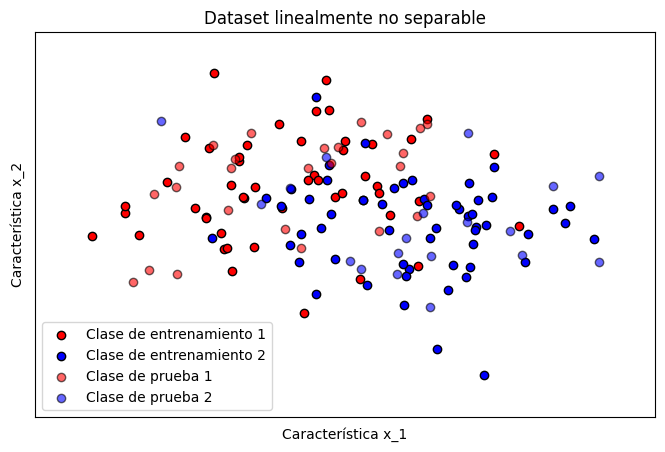

In [ ]:
# Visualización del conjunto de prueba creado
plot_dataset(X_train, y_train, X_test, y_test)

# Creación del MLP

Nuestra implementación de un MLP en python tendrá la siguiente estructura:

```python
class PerceptronMulticapa():
    def __init__(self, params=None):
      pass

    def inicializacion(self):
        return None

    def forward_pass(self):
        return None

    def backward_pass(self):
        return None

    def calcular_perdida_entropia_cruzada(self):
        return None

    def actualizar_pesos(self):
        return None

    def prediccion(self):
        return None

    def entrenar(self):
        return None

    def evaluar(self):
        return None
```

In [ ]:
params = {}
params['capa_entrada'] = 2
params['capa_oculta'] = 50
params['capa_salida'] = 1
params['epochs'] = 100
params['lr'] = 0.1

## 1. Inicialización

Asignación de atributos e inicialización de pesos y biases

In [ ]:
class PerceptronMulticapa():
    def __init__(self, params=None):
        # Asignación de hiperparámetros
        self.capa_entrada = params['capa_entrada']
        self.capa_oculta = params['capa_oculta']
        self.capa_salida = params['capa_salida']
        self.epochs = params['epochs']
        self.lr = params['lr']
        self.relu = (lambda x: x*(x > 0))
        self.derivada_relu = (lambda x: 1 * (x>0))
        self.sigmoide = (lambda x: 1/(1 + np.exp(-x)))
        self.derivada_sigmoide = (lambda x: x*(1-x))

        # inicialización de pesos y bias
        self.inicializacion()

    def inicializacion(self):
        # inicialización de pesos y bias aleatoria
        np.random.seed(42) # fijar una semilla para reproducir resultados

        # Capa Oculta
        self.pesos_capa_oculta = np.random.rand(self.capa_oculta, self.capa_entrada)
        self.bias_capa_oculta = np.ones((self.capa_oculta, 1))

        # Capa de salida
        self.pesos_capa_salida = np.random.rand(self.capa_salida, self.capa_oculta)
        self.bias_capa_salida = np.ones((self.capa_salida, 1))

In [ ]:
# Instanciamos nuestro perceptrón multicapa
mlp =  PerceptronMulticapa(params)

In [ ]:
print('Dimensión pesos capa oculta: {}'.format(mlp.pesos_capa_oculta.shape))
print('Dimensión biases capa oculta: {}'.format(mlp.bias_capa_oculta.shape))
print('Dimensión pesos capa salida: {}'.format(mlp.pesos_capa_salida.shape))
print('Dimensión bias capa salida: {}'.format(mlp.bias_capa_salida.shape))

Dimensión pesos capa oculta: (50, 2)
Dimensión biases capa oculta: (50, 1)
Dimensión pesos capa salida: (1, 50)
Dimensión bias capa salida: (1, 1)


In [ ]:
# ejemplo pesos capa salida
mlp.pesos_capa_salida

array([[0.03142919, 0.63641041, 0.31435598, 0.50857069, 0.90756647,
        0.24929223, 0.41038292, 0.75555114, 0.22879817, 0.07697991,
        0.28975145, 0.16122129, 0.92969765, 0.80812038, 0.63340376,
        0.87146059, 0.80367208, 0.18657006, 0.892559  , 0.53934224,
        0.80744016, 0.8960913 , 0.31800347, 0.11005192, 0.22793516,
        0.42710779, 0.81801477, 0.86073058, 0.00695213, 0.5107473 ,
        0.417411  , 0.22210781, 0.11986537, 0.33761517, 0.9429097 ,
        0.32320293, 0.51879062, 0.70301896, 0.3636296 , 0.97178208,
        0.96244729, 0.2517823 , 0.49724851, 0.30087831, 0.28484049,
        0.03688695, 0.60956433, 0.50267902, 0.05147875, 0.27864646]])

## 2. Propagación hacia adelante (forward)

Método de propagación hacia adelante

In [ ]:
def forward_pass(self, x):
    # Realizar la operacion Wx + b de la capa oculta, x = x_0
    z = np.matmul(self.pesos_capa_oculta, x) + self.bias_capa_oculta
    # Aplicar función de activación
    h = self.relu(z) # z = x_1, h = x_2

    # Aplicar la operación Wh + b para generar la salida, y = x_3
    y = np.matmul(self.pesos_capa_salida, h) + self.bias_capa_salida
    # Aplicar función de activación softmax para la clasificación
    y_pred = self.sigmoide(y) # y = x_4

    return z, h, y_pred

In [ ]:
# Añadimos nuestro nuevo método
setattr(PerceptronMulticapa, 'forward_pass', forward_pass)

In [ ]:
# seleccionamos una muestra del dataset
# por ser solo uno se redimensiona para que tenga la estructura de entrada propia
x_i = X_train[0,:].reshape((-1, 1))
z, h, y_pred = mlp.forward_pass(x_i)

In [ ]:
print('Dimensión biases capa oculta: {}'.format(z.shape))
print('Dimensión de la capa oculta: {}'.format(h.shape))
print('Predicción: {}'.format(y_pred))
print('Capa oculta: {}'.format(h))

Dimensión biases capa oculta: (50, 1)
Dimensión de la capa oculta: (50, 1)
Predicción: [[1.]]
Capa oculta: [[0.72633077]
 [1.01761811]
 [0.99129875]
 [0.64226347]
 [0.91951467]
 [0.58240149]
 [1.22554416]
 [0.98915428]
 [0.88627666]
 [1.03760999]
 [1.17304912]
 [0.95112959]
 [0.83016191]
 [0.85085938]
 [1.20642355]
 [1.1577875 ]
 [0.60864823]
 [1.01505623]
 [1.07377182]
 [1.06886654]
 [0.82949748]
 [0.61426555]
 [0.80843687]
 [0.89119274]
 [1.12821114]
 [1.03116189]
 [0.96713639]
 [0.82449353]
 [0.94790496]
 [0.87459926]
 [1.02976633]
 [1.1607742 ]
 [0.86948377]
 [0.70204454]
 [0.59561443]
 [1.20847428]
 [0.64438828]
 [0.95081357]
 [1.26279179]
 [1.08640592]
 [1.05700326]
 [1.09879949]
 [0.97640557]
 [0.99963981]
 [1.13251031]
 [0.73290002]
 [1.0450389 ]
 [1.0785398 ]
 [1.0125701 ]
 [0.96240177]]


## 3. Función para calcular el error

Método que permite conocer el error de una predicción con respecto a la etiqueta real.

In [ ]:
def calcular_perdida_entropia_cruzada(self, y_real, y_pred):
    epsilon = 1e-12
    # asegura que los valores de las predicciones esten en un rango
    # seguro para evitar logaritmos de 0 y 1
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # calculo de la perdida
    perdida = -(((1 - y_real) * np.log(1 - y_pred + epsilon)) + (y_real * np.log(y_pred + epsilon)))

    return perdida

In [ ]:
# Añadimos nuestro nuevo método
setattr(PerceptronMulticapa, 'calcular_perdida_entropia_cruzada', calcular_perdida_entropia_cruzada)

In [ ]:
# Probamos nuestra función de error
y_real = y_train[0]
error = mlp.calcular_perdida_entropia_cruzada(y_real, y_pred)
print(f'Error: {error}')

Error: [[6.67165212e-11]]


## 4. Propagación hacía atrás (backward)

Método para propagar los errores hacía atrás.

In [ ]:
def backward_pass(self, x, z, y_real, h, y_pred):
    # Propagación de error en la capa de salida
    # Calculo de error en la capa de salida g_out
    #error_salida =  (y_pred - y_real) * self.derivada_sigmoide(y_pred)
    error_salida =  y_pred - y_real

    # gradiente de los pesos respecto a la capa de salida
    # X_in * g_out = error_salida * h.T
    # X_in = h es la entrada a la capa de salida
    self.gradiente_pesos_capa_salida = np.matmul(error_salida, h.T)
    # gradiente de los bias respecto a la capa de salida
    self.gradiente_bias_capa_salida = error_salida

    # Propagación de error en la capa oculta
    # gradiente respecto a la capa oculta
    # (g_out * W) * relu'(X_in)
    # X_in en esta capa es la salida de aplicar la primera transformación
    error_oculta = np.matmul(self.pesos_capa_salida.T, error_salida) * self.derivada_relu(z)
    # gradientes con respecto a la capa oculta, de nuevo g_out * X_in
    self.gradiente_pesos_capa_oculta = np.matmul(error_oculta, x.T)
    self.gradiente_bias_capa_oculta = error_oculta

In [ ]:
# Añadimos nuestro nuevo método
setattr(PerceptronMulticapa, 'backward_pass', backward_pass)

In [ ]:
# calcular propagación de errores
mlp.backward_pass(x_i, z, y_real, h, y_pred)

In [ ]:
print('Dimensión gradientes capa oculta: {}'.format(mlp.gradiente_pesos_capa_oculta.shape))
print('Gradientes capa oculta: {}'.format(mlp.gradiente_pesos_capa_oculta))

Dimensión gradientes capa oculta: (50, 2)
Gradientes capa oculta: [[-8.14789923e-13  9.33629314e-13]
 [-1.64987027e-11  1.89050846e-11]
 [-8.14956162e-12  9.33819800e-12]
 [-1.31845056e-11  1.51075026e-11]
 [-2.35283225e-11  2.69599942e-11]
 [-6.46280811e-12  7.40542677e-12]
 [-1.06390243e-11  1.21907558e-11]
 [-1.95873816e-11  2.24442561e-11]
 [-5.93150715e-12  6.79663407e-12]
 [-1.99567547e-12  2.28675032e-12]
 [-7.51169840e-12  8.60730064e-12]
 [-4.17960177e-12  4.78920839e-12]
 [-2.41020651e-11  2.76174187e-11]
 [-2.09502196e-11  2.40058678e-11]
 [-1.64207563e-11  1.88157695e-11]
 [-2.25922909e-11  2.58874398e-11]
 [-2.08348990e-11  2.38737273e-11]
 [-4.83675923e-12  5.54221410e-12]
 [-2.31392593e-11  2.65141851e-11]
 [-1.39822466e-11  1.60215964e-11]
 [-2.09325850e-11  2.39856612e-11]
 [-2.32308329e-11  2.66191149e-11]
 [-8.24412154e-12  9.44654975e-12]
 [-2.85305512e-12  3.26918119e-12]
 [-5.90913412e-12  6.77099787e-12]
 [-1.10726102e-11  1.26875814e-11]
 [-2.12067279e-11  2.429

## 5. Entrenamiento

Método para iterar sobre todo el conjunto de datos y entrenar la red. Antes se deberá generar otro método que haga la respectiva actualización de pesos, una vez ya los gradientes son calculados.

In [ ]:
def actualizar_pesos(self):
    # actualizar pesos aplicando gradiente descendiente
    self.pesos_capa_salida -= self.lr * self.gradiente_pesos_capa_salida
    self.bias_capa_salida -= self.lr * self.gradiente_bias_capa_salida
    self.pesos_capa_oculta -= self.lr * self.gradiente_pesos_capa_oculta
    self.bias_capa_oculta -= self.lr * self.gradiente_bias_capa_oculta

def entrenar(self, X, y):
    # almacenar el costo de cada iteración
    self.costo_historia = []

    # iterar sobre el número de épocas
    for iteracion in tqdm(range(self.epochs), desc='Iteraciones'):
        # iterar sobre los datos de entrenamiento
        error_total = 0 # error para la iteración i
        # iterar sobre todo el conjunto de datos
        for i, (x_i, y_i) in tqdm(enumerate(zip(X,y)), desc='Datos', leave=False):
            # asegurar de que la entrada y la salida solo tenga una columna
            x_i = x_i.reshape(-1, 1)
            y_i = y_i.reshape(-1, 1)
            # aplicar propagación hacia adelante
            z, h, y_pred = self.forward_pass(x_i)
            # calcular la perdida de entropia cruzada
            perdida = self.calcular_perdida_entropia_cruzada(y_i, y_pred)
            error_total += perdida
            # aplicar propagación hacia atras
            self.backward_pass(x_i, z,  y_i, h, y_pred)
            # actualizar pesos y bias usando gradiente descendiente
            self.actualizar_pesos()

        # almacenar los costos de cada iteración
        self.costo = error_total / len(X)
        self.costo_historia.append(self.costo)

    #print(f'costo: {self.costo[0][0]} en la iteración: {iteracion}')

In [ ]:
# Añadimos nuestros nuevos métodos
setattr(PerceptronMulticapa, 'actualizar_pesos', actualizar_pesos)
setattr(PerceptronMulticapa, 'entrenar', entrenar)

In [ ]:
# realizamos el respectivo entrenamiento
mlp.entrenar(X_train, y_train)

Iteraciones:   0%|          | 0/100 [00:00<?, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

Datos: 0it [00:00, ?it/s]

In [ ]:
print(f'Costo final: {mlp.costo}')

Costo final: [[0.44965122]]


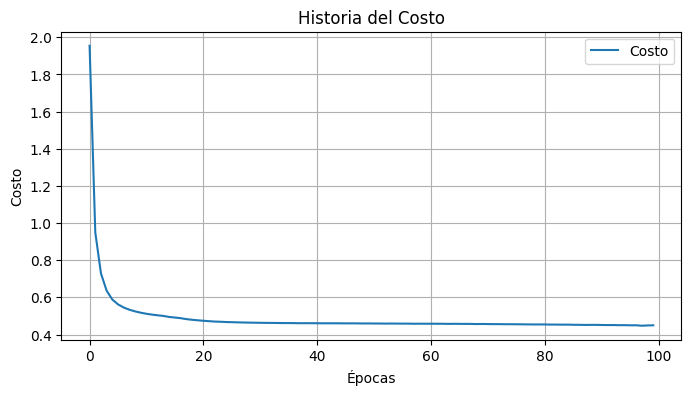

In [ ]:
# Visualizar el cambio del costo durante el entrenamiento
plot_cost_history(np.array(mlp.costo_historia).ravel())

## Evaluación

Para evaluar nuestro modelo con la información de test, creamos primero la función de predicción y seguidamente evaluamos el rendimiento en test.

In [ ]:
def prediccion(self, X):
    predicciones = []
    for x_i in X:
        x_i = x_i.reshape(-1, 1)  # Asegurar que x_i sea una columna
        z, _, y_pred = self.forward_pass(x_i)
        predicciones.append(y_pred)
    return np.array(predicciones).flatten()

def evaluar(self, X, y, umbral):
    # generar predicciones
    y_pred = self.prediccion(X)
    # convertir a 0 y 1 bajo un umbral
    y_pred = np.where(y_pred >= umbral, 1, 0)
    # generar reporte de clasificación y matriz de confusión
    print(classification_report(y, y_pred))
    cm = confusion_matrix(y, y_pred)

    # visualizacion de la matriz de confusion
    ConfusionMatrixDisplay(cm).plot()
    plt.show()

    return y_pred, cm

In [ ]:
# Añadimos nuestros nuevos métodos
setattr(PerceptronMulticapa, 'prediccion', prediccion)
setattr(PerceptronMulticapa, 'evaluar', evaluar)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.74      0.74      0.74        19

    accuracy                           0.78        45
   macro avg       0.77      0.77      0.77        45
weighted avg       0.78      0.78      0.78        45



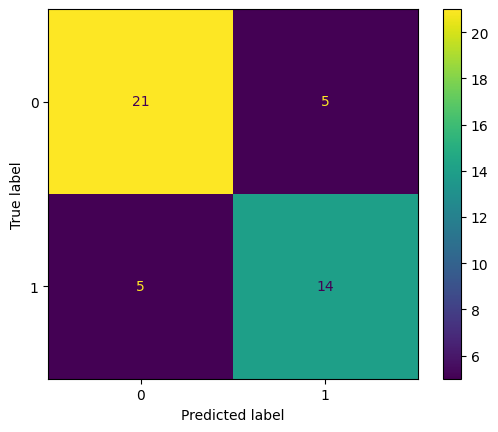

In [ ]:
# evaluar y visualizar la matriz de confusion usando sklearn
y_pred, cm = mlp.evaluar(X_test, y_test, umbral=0.5)

## 7. Interpretabilidad

Gráficamos algunos aspectos de interpretabilidad como la frontera de decisión generada.

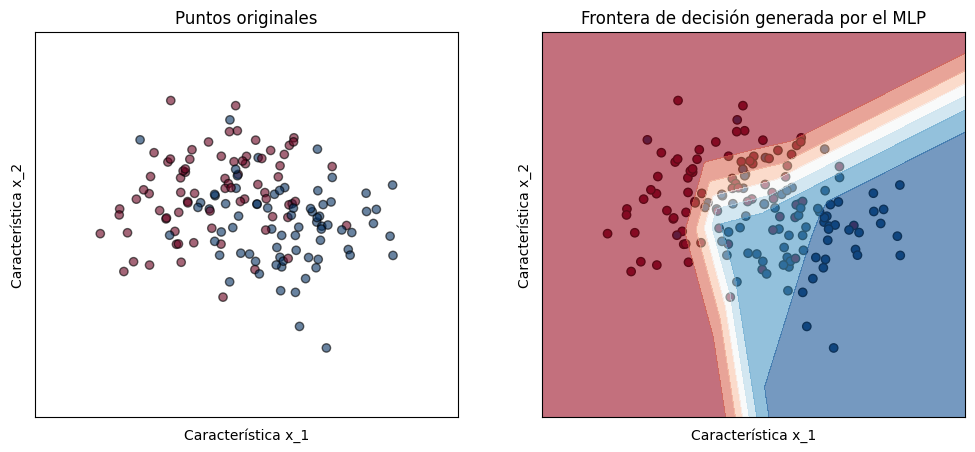

In [ ]:
plot_decision_boundary(mlp, X, y, h=0.02)

## Clase python PerceptronMulticapa Completo

In [ ]:
class PerceptronMulticapa():
    def __init__(self, params=None):
        # Asignación de hiperparámetros
        self.capa_entrada = params['capa_entrada']
        self.capa_oculta = params['capa_oculta']
        self.capa_salida = params['capa_salida']
        self.epochs = params['epochs']
        self.lr = params['lr']
        self.relu = (lambda x: x*(x > 0))
        self.derivada_relu = (lambda x: 1 * (x>0))
        self.sigmoide = (lambda x: 1/(1 + np.exp(-x)))
        self.derivada_sigmoide = (lambda x: x*(1-x))

        # inicialización de pesos y bias
        self.inicializacion()

    def inicializacion(self):
        # inicialización de pesos y bias aleatoria
        np.random.seed(42) # fijar una semilla para reproducir resultados

        # Capa Oculta
        self.pesos_capa_oculta = np.random.rand(self.capa_oculta, self.capa_entrada)
        self.bias_capa_oculta = np.ones((self.capa_oculta, 1))

        # Capa de salida
        self.pesos_capa_salida = np.random.rand(self.capa_salida, self.capa_oculta)
        self.bias_capa_salida = np.ones((self.capa_salida, 1))

    def forward_pass(self, x):
        # Realizar la operacion Wx + b de la capa oculta, x = x_0
        z = np.matmul(self.pesos_capa_oculta, x) + self.bias_capa_oculta
        # Aplicar función de activación
        h = self.relu(z) # z = x_1, h = x_2

        # Aplicar la operación Wh + b para generar la salida, y = x_3
        y = np.matmul(self.pesos_capa_salida, h) + self.bias_capa_salida
        # Aplicar función de activación softmax para la clasificación
        y_pred = self.sigmoide(y) # y = x_4

        return z, h, y_pred

    def actualizar_pesos(self):
        # actualizar pesos aplicando gradiente descendiente
        self.pesos_capa_salida -= self.lr * self.gradiente_pesos_capa_salida
        self.bias_capa_salida -= self.lr * self.gradiente_bias_capa_salida
        self.pesos_capa_oculta -= self.lr * self.gradiente_pesos_capa_oculta
        self.bias_capa_oculta -= self.lr * self.gradiente_bias_capa_oculta

    def backward_pass(self, x, z, y_real, h, y_pred):
        # Propagación de error en la capa de salida
        # Calculo de error en la capa de salida g_out
        #error_salida =  (y_pred - y_real) * self.derivada_sigmoide(y_pred)
        error_salida =  y_pred - y_real

        # gradiente de los pesos respecto a la capa de salida
        # X_in * g_out = error_salida * h.T
        # X_in = h es la entrada a la capa de salida
        self.gradiente_pesos_capa_salida = np.matmul(error_salida, h.T)
        # gradiente de los bias respecto a la capa de salida
        self.gradiente_bias_capa_salida = error_salida

        # Propagación de error en la capa oculta
        # gradiente respecto a la capa oculta
        # (g_out * W) * relu'(X_in)
        # X_in en esta capa es la salida de aplicar la primera transformación
        error_oculta = np.matmul(self.pesos_capa_salida.T, error_salida) * self.derivada_relu(z)
        # gradientes con respecto a la capa oculta, de nuevo g_out * X_in
        self.gradiente_pesos_capa_oculta = np.matmul(error_oculta, x.T)
        self.gradiente_bias_capa_oculta = error_oculta

    def entrenar(self, X, y):
        # almacenar el costo de cada iteración
        self.costo_historia = []

        # iterar sobre el número de épocas
        for iteracion in tqdm(range(self.epochs), desc='Iteraciones'):
            # iterar sobre los datos de entrenamiento
            error_total = 0 # error para la iteración i
            # iterar sobre todo el conjunto de datos
            for i, (x_i, y_i) in tqdm(enumerate(zip(X,y)), desc='Datos', leave=False):
                # asegurar de que la entrada y la salida solo tenga una columna
                x_i = x_i.reshape(-1, 1)
                y_i = y_i.reshape(-1, 1)
                # aplicar propagación hacia adelante
                z, h, y_pred = self.forward_pass(x_i)
                # calcular la perdida de entropia cruzada
                perdida = self.calcular_perdida_entropia_cruzada(y_i, y_pred)
                error_total += perdida
                # aplicar propagación hacia atras
                self.backward_pass(x_i, z,  y_i, h, y_pred)
                # actualizar pesos y bias usando gradiente descendiente
                self.actualizar_pesos()

            # almacenar los costos de cada iteración
            self.costo = error_total / len(X)
            self.costo_historia.append(self.costo)

        #print(f'costo: {self.costo[0][0]} en la iteración: {iteracion}')

    def calcular_perdida_entropia_cruzada(self, y_real, y_pred):
        epsilon = 1e-12
        # asegura que los valores de las predicciones esten en un rango
        # seguro para evitar logaritmos de 0 y 1
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        # calculo de la perdida
        perdida = -(((1 - y_real) * np.log(1 - y_pred + epsilon)) + (y_real * np.log(y_pred + epsilon)))

        return perdida

    def prediccion(self, X):
        predicciones = []
        for x_i in X:
            x_i = x_i.reshape(-1, 1)  # Asegurar que x_i sea una columna
            z, _, y_pred = self.forward_pass(x_i)
            predicciones.append(y_pred)
        return np.array(predicciones).flatten()

    def evaluar(self, X, y, umbral):
        # generar predicciones
        y_pred = self.prediccion(X)
        # convertir a 0 y 1 bajo un umbral
        y_pred = np.where(y_pred >= umbral, 1, 0)
        # generar reporte de clasificación y matriz de confusión
        print(classification_report(y, y_pred))
        cm = confusion_matrix(y, y_pred)

        # visualizacion de la matriz de confusion
        ConfusionMatrixDisplay(cm).plot()
        plt.show()

        return y_pred, cm
